In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()


/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Load Data

In [24]:
data = pd.read_csv('online_shoppers_intention.csv')

In [25]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Administrative,0,0,0,0,0,0,0,1,0,0
Administrative_Duration,0,0,0,0,0,0,0,0,0,0
Informational,0,0,0,0,0,0,0,0,0,0
Informational_Duration,0,0,0,0,0,0,0,0,0,0
ProductRelated,1,2,1,2,10,19,1,0,2,3
ProductRelated_Duration,0,64,0,2.66667,627.5,154.217,0,0,37,738
BounceRates,0.2,0,0.2,0.05,0.02,0.0157895,0.2,0.2,0,0
ExitRates,0.2,0.1,0.2,0.14,0.05,0.0245614,0.2,0.2,0.1,0.0222222
PageValues,0,0,0,0,0,0,0,0,0,0
SpecialDay,0,0,0,0,0,0,0.4,0,0.8,0.4


In [26]:
### Begin code

# Import packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt

# Read data and display data head

data = pd.read_csv('online_shoppers_intention.csv')
data.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0,0,0,0,0
Informational,0,0,0,0,0
Informational_Duration,0,0,0,0,0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0,64,0,2.66667,627.5
BounceRates,0.2,0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0,0,0,0,0
SpecialDay,0,0,0,0,0


As stated above, our dataset has 10 numerical features and 8 categorical features.
Taking a look at the dataset description:

## Column Descriptions:
**Administrative:** This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration:** This is the amount of time spent in this category of pages.

**Informational:** This is the number of pages of this type (informational) that the user visited.

**Informational_Duration:** This is the amount of time spent in this category of pages.

**ProductRelated:** This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration:** This is the amount of time spent in this category of pages.

**BounceRates:** The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates:** The percentage of pageviews on the website that end at that specific page.

**PageValues:** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. <br>
[More information about how this is calculated](https://support.google.com/analytics/answer/2695658?hl=en)

**SpecialDay:** This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

**Month:** Contains the month the pageview occurred, in string form.

**OperatingSystems:** An integer value representing the operating system that the user was on when viewing the page.

**Browser:** An integer value representing the browser that the user was using to view the page.

**Region:** An integer value representing which region the user is located in.

**TrafficType:** An integer value representing what type of traffic the user is categorized into. <br>
[Read more about traffic types here.](https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)

**VisitorType:** A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend:** A boolean representing whether the session is on a weekend.

**Revenue:** A boolean representing whether or not the user completed the purchase.



## Exploratory Data Analysis

In [27]:
# Describe the dataset
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


<AxesSubplot:>

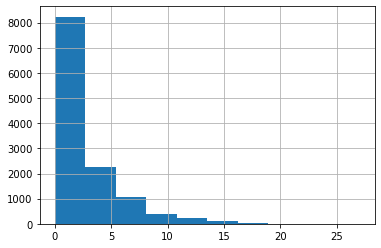

In [28]:
data.Administrative.hist()

In [29]:
# Check for null values in data
nullcount = data.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


Here we can see that there are no null values in the dataset. 
We do not need to fix or replace any null values in the dataset.

In [30]:
# Checking for number of unique values for each feature

uniques = data.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


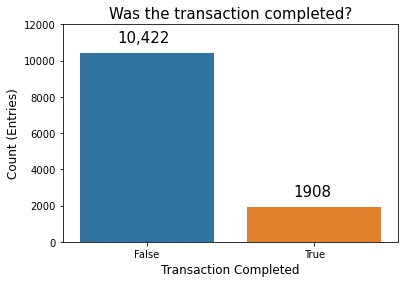

In [31]:
# Visualize the data

sns.countplot(data['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()


We can see that the number of entries where the customer ended up not purchasing is much higher that the number of entries where the customer ended up completing a transaction. This makes sense, as a majority of normal online shopping ends without a purchase.

## Feature Cleaning

We will try classification prior to any feature engineering to see a baseline classification based on our features. In order to prepare our data, we need to switch our labels to the correct format. We have a few features that need to be adjusted.

First, we drop the month column. The 'Month' column only has 10 unique types, which indicates that it is missing two month's of data. Each month has varying numbers of entries, which could unfairly bias our data to prefer classification by month. We can see below the distribution of each month in the 'Month' column. Additionally, time-sensitivity is already contained in the 'SpecialDay' column, which influences buying decision, so the month column is slightly redundant.

/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


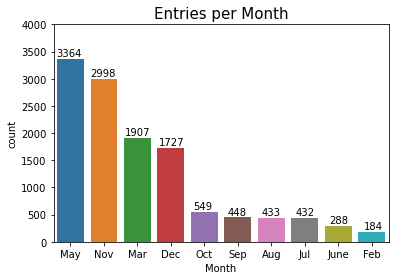

In [32]:
monthly = data['Month'].value_counts()

sns.countplot(data['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

We can see here that the 'Month' column is missing January and April. We can see visually that several months have many samples (May, Nov) and a couple have very few samples (Feb, June). We will remove this column.

Next, let us take a look at the 'OperatingSystems' and 'Browser' columns.

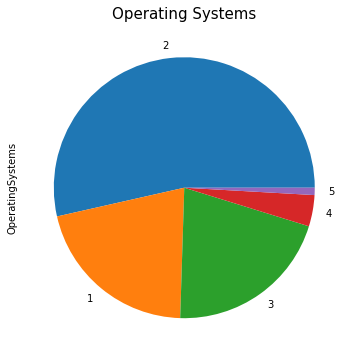

In [33]:
data['OperatingSystems'] = data['OperatingSystems'].replace([5,6,7,8],5)
os_plot = data['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Here we have the Operating Systems, labeled by number. Low-usage browsers have been consolidated into label '5'.
We can see that a majority of users use operating system \#2. Operating systems can indicate users of a sepcifc type of computer and may portray certain user archetypes (Windows users, Mac users, Linux users). For now, we will forgo usage of this column for our classifier.

/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


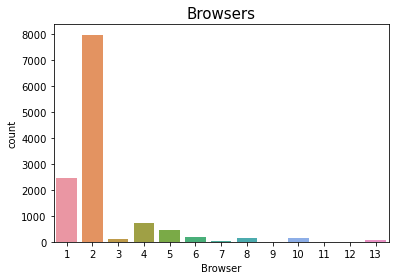

In [34]:
sns.countplot(data['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

Browser choice is even more polarizing than Operating System. Here we see that a large majority of users use browser 2, with a smaller number of users using browser 1. All other browsers represent a small subsection of online users. We will not use this as it does not contribute much to our model.

In [35]:
# Removing unneccessary columns from data: shopping_clean

data_clean = data.drop(['Month','Browser','OperatingSystems','Region','TrafficType'], axis=1)

In [36]:
processed = pd.concat([
    data_clean,
    pd.get_dummies(data['OperatingSystems'], prefix='OperatingSystems'),
    pd.get_dummies(data['Region'], prefix='Region'),
#     pd.get_dummies(data['TrafficType'], prefix='TrafficType'),
],axis=1)

In [37]:
processed.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0,0,0,0,0
Informational,0,0,0,0,0
Informational_Duration,0,0,0,0,0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0,64,0,2.66667,627.5
BounceRates,0.2,0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0,0,0,0,0
SpecialDay,0,0,0,0,0


In [38]:
processed.to_csv('data_processed.csv', index=False)